# Random Forest VS Decision Tree
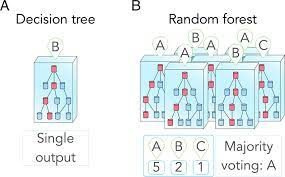

- Random Forest is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes (for classification) or the mean prediction (for regression) of the individual trees.
- In a Random Forest model, each tree is trained independently on a bootstrapped sample of the dataset, and the final prediction is obtained by averaging (for regression) or taking the majority vote (for classification) of the predictions of all trees.

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [4]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [5]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[40  3]
 [ 1 70]]


In [6]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



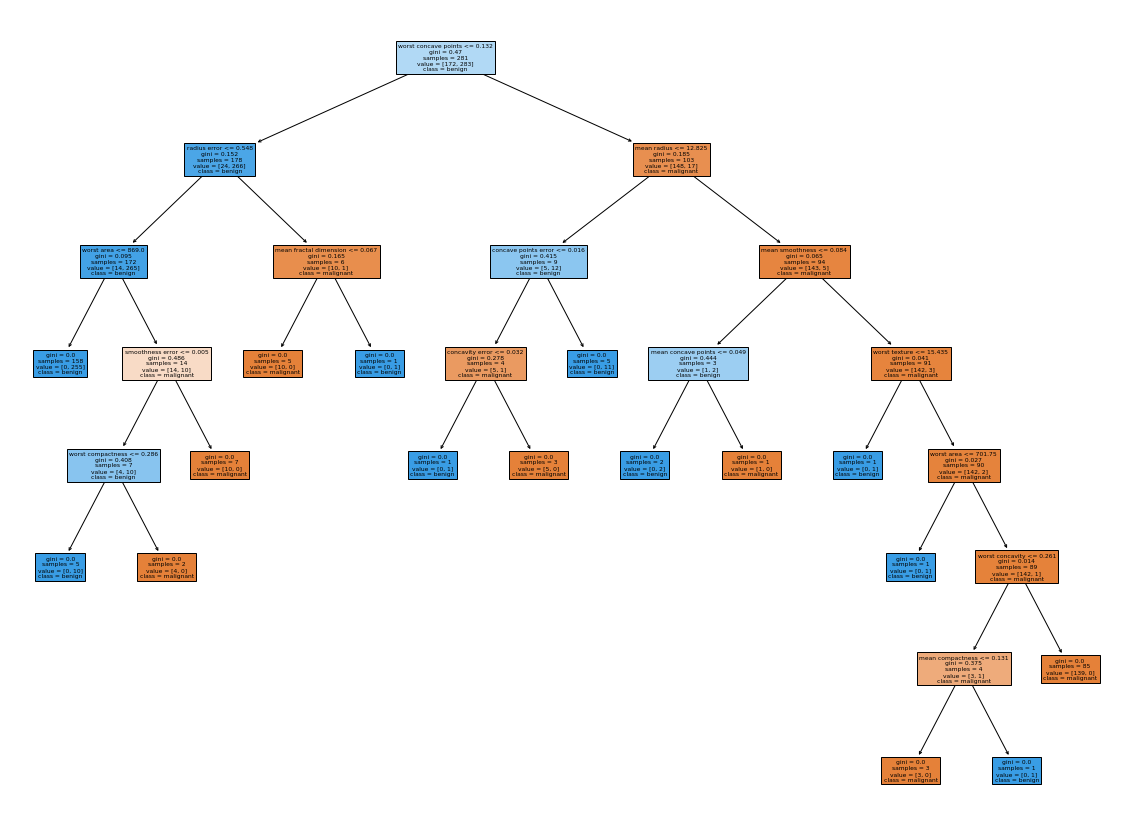

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the top 3 trees
# 1
plt.figure(figsize=(20, 15))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()


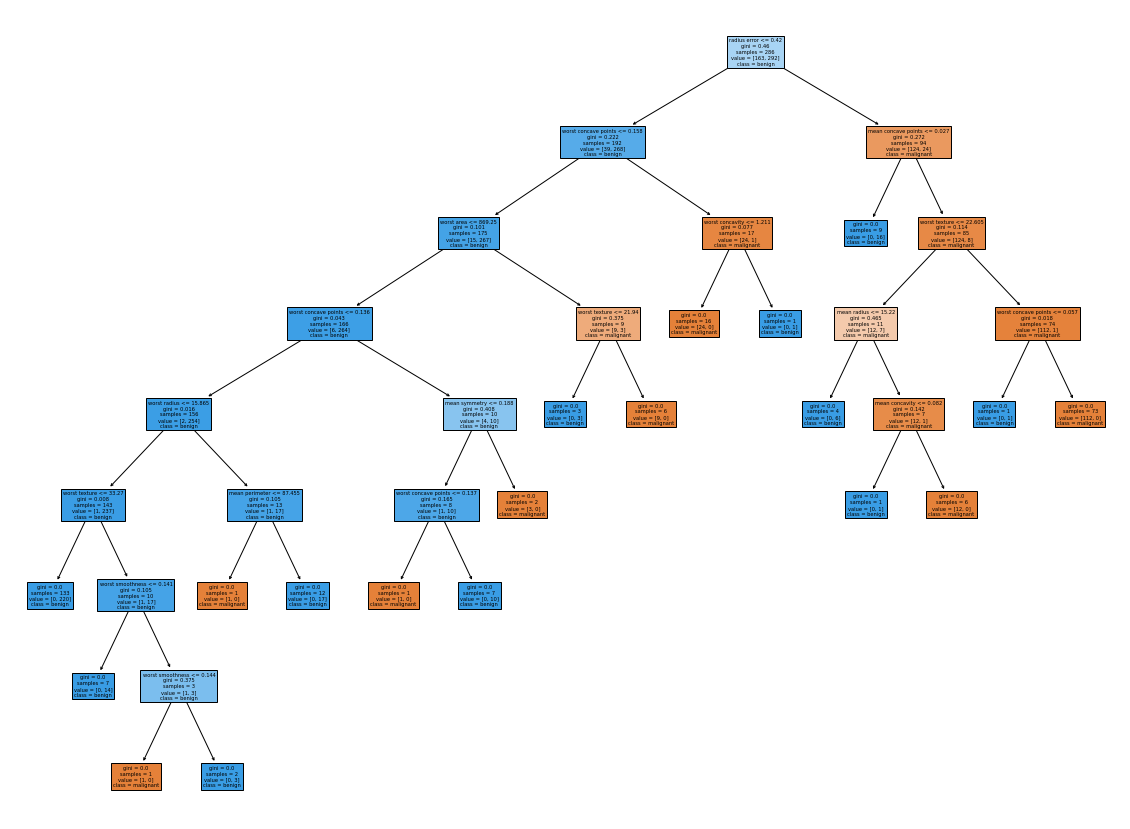

In [8]:
# 2
plt.figure(figsize=(20, 15))
plot_tree(rf_model.estimators_[1], filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

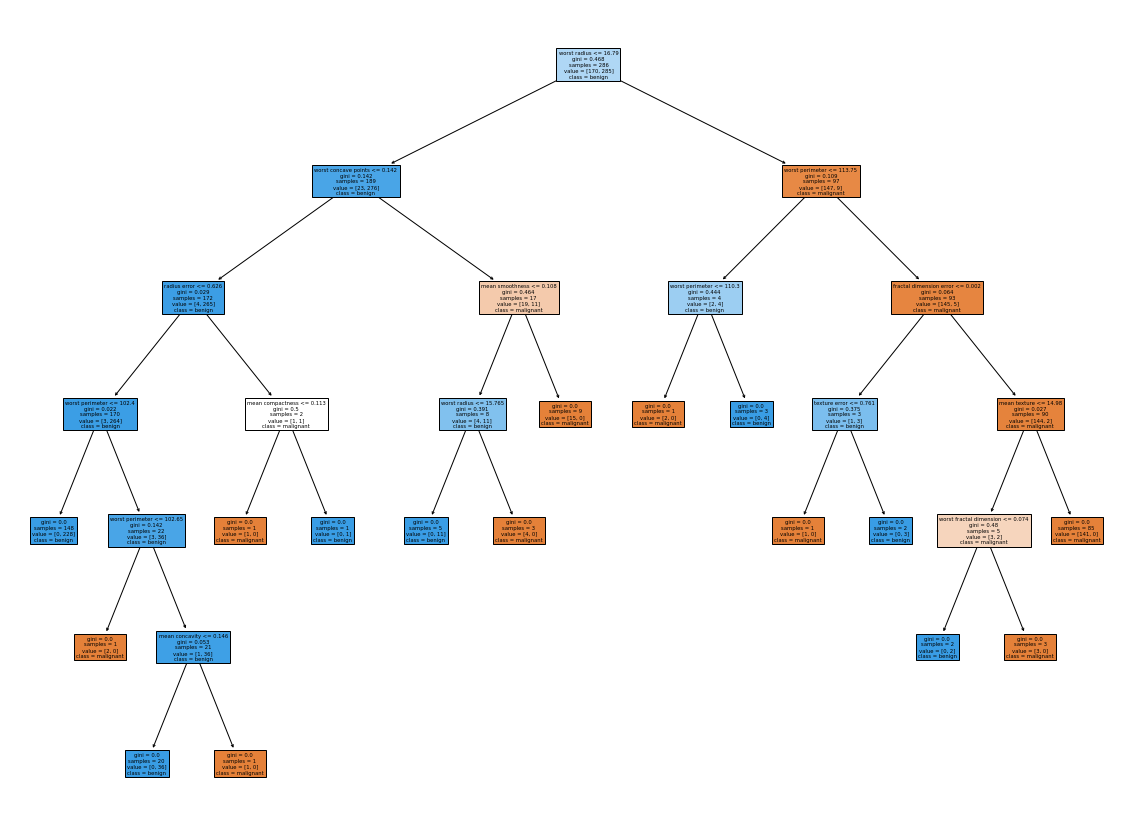

In [9]:
# 3
plt.figure(figsize=(20, 15))
plot_tree(rf_model.estimators_[3], filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()